In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('preprocessed.csv')

In [6]:
# Filter to only buyers
buyer_entropy_means = df[(df['income_group'] != 99) & (df['is_buyer'] == 1)] \
    .groupby('income_group_label')['category_entropy'] \
    .mean()

print("Average Category Entropy (Buyers Only):\n")
print(buyer_entropy_means.round(5))

Average Category Entropy (Buyers Only):

income_group_label
High    0.65874
Low     0.65228
Mid     0.67252
Name: category_entropy, dtype: float64


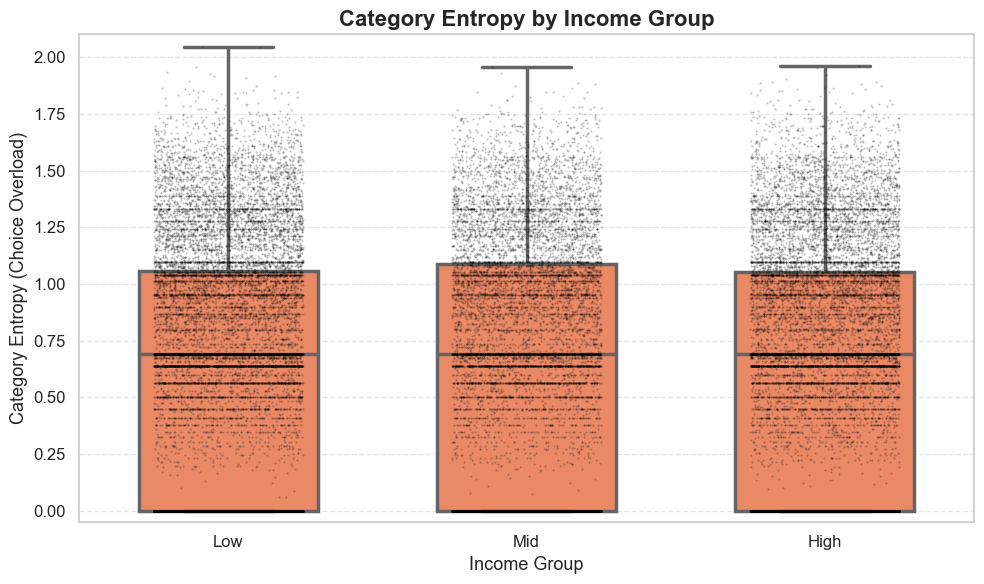

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set clean style
sns.set(style='whitegrid', context='notebook', palette='Set2')

# Filter for buyers only
buyers_df = df[(df['income_group'] != 99) & (df['is_buyer'] == 1)].copy()

# Ensure income_group_label is ordered: Low → Mid → High
ordered_labels = ['Low', 'Mid', 'High']
buyers_df['income_group_label'] = pd.Categorical(
    buyers_df['income_group_label'],
    categories=ordered_labels,
    ordered=True
)

# Create plot
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=buyers_df,
    x='income_group_label',
    y='category_entropy',
    color='coral',
    linewidth=2.5,
    fliersize=0,
    width=0.6
)

sns.stripplot(
    data=buyers_df,
    x='income_group_label',
    y='category_entropy',
    color='black',
    alpha=0.25,
    jitter=0.25,
    marker='.',
    size=3
)

plt.title("Category Entropy by Income Group", fontsize=16, weight='bold')
plt.xlabel("Income Group", fontsize=13)
plt.ylabel("Category Entropy (Choice Overload)", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(-0.05, 2.1)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


In [14]:
# Filter buyers and remove unknown income group
buyers_df = df[(df['income_group'] != 99) & (df['is_buyer'] == 1)].copy()

# Define the income group order if needed
buyers_df['income_group_label'] = pd.Categorical(
    buyers_df['income_group_label'],
    categories=['Low', 'Mid', 'High'],
    ordered=True
)

# Compute Q1 (25%), median (50%), and Q3 (75%) for each income group
quartiles = buyers_df.groupby('income_group_label')['category_entropy'].quantile([0.25, 0.5, 0.75]).unstack()

# Rename the columns for clarity
quartiles.columns = ['Q1 (25%)', 'Median (50%)', 'Q3 (75%)']

# Round and display
print("📊 Category Entropy Quartiles by Income Group (Buyers Only):\n")
print(quartiles.round(3))


📊 Category Entropy Quartiles by Income Group (Buyers Only):

                    Q1 (25%)  Median (50%)  Q3 (75%)
income_group_label                                  
Low                      0.0         0.693     1.057
Mid                      0.0         0.693     1.088
High                     0.0         0.693     1.055


/var/folders/zr/wpwk00wd2ygcddp_nzg3ytfm0000gn/T/ipykernel_4209/247032734.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartiles = buyers_df.groupby('income_group_label')['category_entropy'].quantile([0.25, 0.5, 0.75]).unstack()


In [16]:
import numpy as np

# Re-bin category entropy
buyers_df['entropy_bin'] = pd.cut(
    buyers_df['category_entropy'],
    bins=np.arange(0, 2.1, 0.2)
)

# Group and compute mean conversion rate per bin & income group
binned_stats = buyers_df.groupby(['income_group_label', 'entropy_bin'])['conversion_rate'].mean().reset_index()

# Convert bin intervals to strings for plotting
binned_stats['entropy_bin_str'] = binned_stats['entropy_bin'].astype(str)


/var/folders/zr/wpwk00wd2ygcddp_nzg3ytfm0000gn/T/ipykernel_4209/2774671065.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_stats = buyers_df.groupby(['income_group_label', 'entropy_bin'])['conversion_rate'].mean().reset_index()


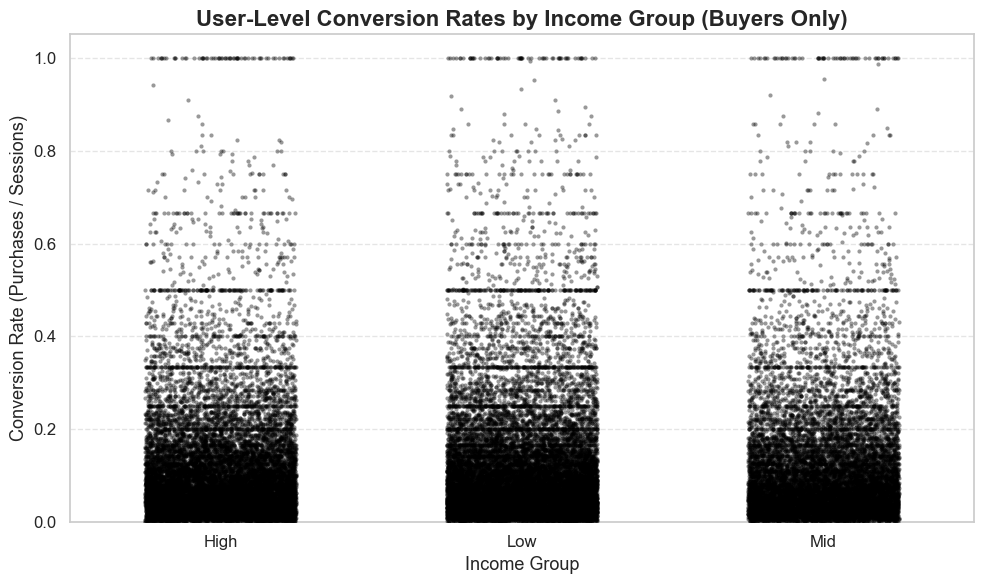

In [17]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df[(df['income_group'] != 99) & (df['is_buyer'] == 1)],
    x='income_group_label',
    y='conversion_rate',
    color='black',
    alpha=0.4,
    jitter=0.25,
    size=3
)

plt.title("User-Level Conversion Rates by Income Group (Buyers Only)", fontsize=16, weight='bold')
plt.xlabel("Income Group", fontsize=13)
plt.ylabel("Conversion Rate (Purchases / Sessions)", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



In [18]:
# Round for display
summary = binned_stats[['income_group_label', 'entropy_bin_str', 'conversion_rate']].copy()
summary.columns = ['Income Group', 'Entropy Bin', 'Avg Conversion Rate']
summary['Avg Conversion Rate'] = summary['Avg Conversion Rate'].round(4)

# Print the full table
pd.set_option('display.max_rows', None)
# print(summary)


In [19]:
# Filter to buyers with known income
buyers_only = df[(df['is_buyer'] == 1) & (df['income_group'] != 99)].copy()

# Map to readable income group labels
buyers_only['income_group'] = pd.Categorical(buyers_only['income_group'], categories=[1, 2, 3], ordered=True)
buyers_only['income_group_label'] = buyers_only['income_group'].map({1: 'Low', 2: 'Mid', 3: 'High'})

# Compute quartiles
conversion_quartiles = buyers_only.groupby('income_group_label')['conversion_rate'].quantile([0.25, 0.75]).unstack()
conversion_quartiles.columns = ['Q1 (25%)', 'Q3 (75%)']
conversion_quartiles['IQR'] = conversion_quartiles['Q3 (75%)'] - conversion_quartiles['Q1 (25%)']

# Round for readability
print("📊 Conversion Rate Quartiles & IQR by Income Group (Buyers Only):\n")
print(conversion_quartiles.round(3))


📊 Conversion Rate Quartiles & IQR by Income Group (Buyers Only):

                    Q1 (25%)  Q3 (75%)    IQR
income_group_label                           
Low                    0.038     0.156  0.119
Mid                    0.037     0.158  0.121
High                   0.036     0.148  0.112


/var/folders/zr/wpwk00wd2ygcddp_nzg3ytfm0000gn/T/ipykernel_4209/2966289017.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_quartiles = buyers_only.groupby('income_group_label')['conversion_rate'].quantile([0.25, 0.75]).unstack()


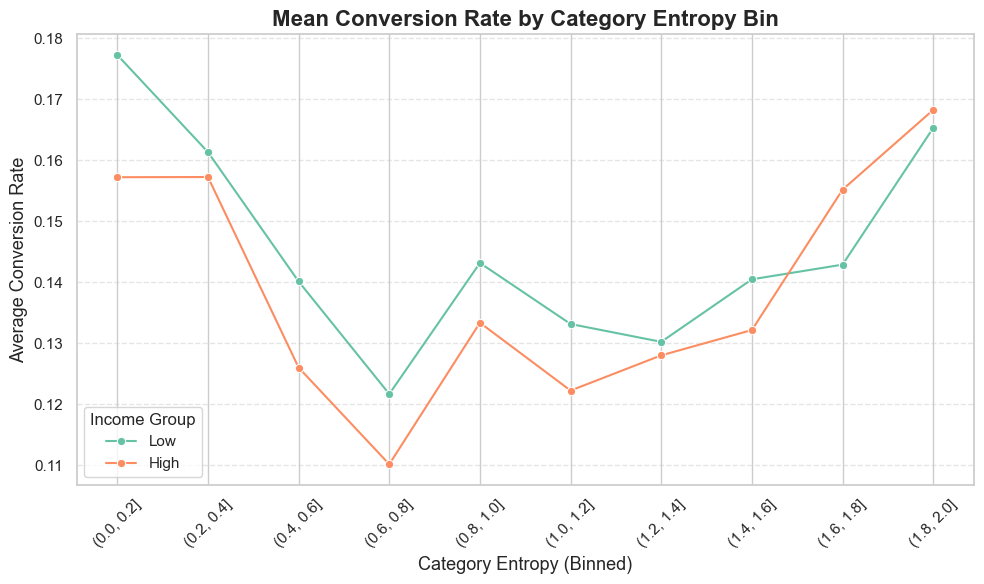

In [20]:
# Filter to only Low and High income groups BEFORE plotting
filtered_stats = binned_stats[binned_stats['income_group_label'].isin(['Low', 'High'])].copy()
# Drop unused categories after filtering
filtered_stats['income_group_label'] = filtered_stats['income_group_label'].cat.remove_unused_categories()


# Convert bin intervals to strings
filtered_stats['entropy_bin_str'] = filtered_stats['entropy_bin'].astype(str)

# Define manual color palette (only for Low and High)
custom_palette = {'Low': '#66c2a5', 'High': '#fc8d62'}

# Plot
plt.figure(figsize=(10, 6))
plot = sns.lineplot(
    data=filtered_stats,
    x='entropy_bin_str',
    y='conversion_rate',
    hue='income_group_label',
    marker='o',
    palette=custom_palette
)

# Clean up legend
handles, labels = plot.get_legend_handles_labels()
plt.legend(handles, labels, title='Income Group')

# Formatting
plt.title("Mean Conversion Rate by Category Entropy Bin", fontsize=16, weight='bold')
plt.xlabel("Category Entropy (Binned)", fontsize=13)
plt.ylabel("Average Conversion Rate", fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



/var/folders/zr/wpwk00wd2ygcddp_nzg3ytfm0000gn/T/ipykernel_4209/514294151.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_buyers
/var/folders/zr/wpwk00wd2ygcddp_nzg3ytfm0000gn/T/ipykernel_4209/514294151.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_buyers
/var/folders/zr/wpwk00wd2ygcddp_nzg3ytfm0000gn/T/ipykernel_4209/514294151.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar.set_yticklabels([f'{int(y*100)}%' for y in bar.get_yticks()])


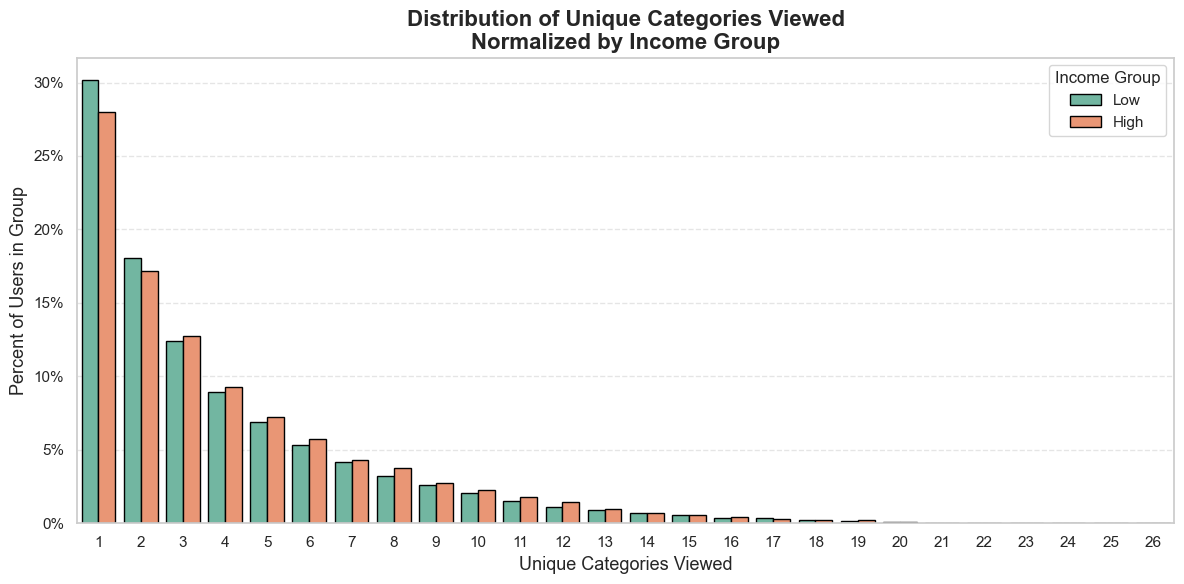

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn theme for cleaner visuals
sns.set(style='whitegrid', context='notebook', palette='Set2')

# Calculate normalized proportions per group
normalized_df = (
    filtered_buyers
    .groupby(['income_group_label', 'unique_categories_viewed'])
    .size()
    .groupby(level=0)
    .transform(lambda x: x / x.sum())
    .reset_index(name='proportion')
)

# Reattach ordered categories
normalized_df['income_group_label'] = pd.Categorical(
    normalized_df['income_group_label'],
    categories=['Low', 'High'],
    ordered=True
)

# Sort by x for better bar alignment
normalized_df = normalized_df.sort_values(by='unique_categories_viewed')

# Plot
plt.figure(figsize=(12, 6))
bar = sns.barplot(
    data=normalized_df,
    x='unique_categories_viewed',
    y='proportion',
    hue='income_group_label',
    palette={'Low': '#66c2a5', 'High': '#fc8d62'},
    edgecolor='black'
)

# Format title and axis labels
plt.title("Distribution of Unique Categories Viewed\nNormalized by Income Group", fontsize=16, weight='bold')
plt.xlabel("Unique Categories Viewed", fontsize=13)
plt.ylabel("Percent of Users in Group", fontsize=13)

# Convert y-axis to percentage scale
bar.set_yticklabels([f'{int(y*100)}%' for y in bar.get_yticks()])

# Aesthetic improvements
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Income Group', title_fontsize=12, fontsize=11, loc='upper right')
plt.tight_layout()
plt.show()

In [26]:
# Create table of actual values shown in the plot
plot_data = (
    filtered_buyers
    .groupby(['income_group_label', 'unique_categories_viewed'])
    .size()
    .groupby(level=0)
    .transform(lambda x: (x / x.sum()) * 100)
    .reset_index(name='percent_of_group')
)

# Round for readability
plot_data['percent_of_group'] = plot_data['percent_of_group'].round(2)

# Pivot for easier side-by-side comparison
pivot_data = plot_data.pivot(index='unique_categories_viewed', columns='income_group_label', values='percent_of_group').fillna(0)

# Display nicely
import pandas as pd
pd.set_option('display.max_rows', None)
print("📊 Percent of Users per Income Group by Unique Categories Viewed:\n")
print(pivot_data)


📊 Percent of Users per Income Group by Unique Categories Viewed:

income_group_label          Low   High
unique_categories_viewed              
1                         30.18  27.99
2                         18.08  17.17
3                         12.41  12.73
4                          8.96   9.27
5                          6.86   7.22
6                          5.31   5.74
7                          4.14   4.32
8                          3.22   3.79
9                          2.61   2.72
10                         2.08   2.29
11                         1.51   1.79
12                         1.10   1.45
13                         0.92   0.97
14                         0.68   0.69
15                         0.58   0.54
16                         0.38   0.41
17                         0.35   0.29
18                         0.24   0.22
19                         0.15   0.19
20                         0.09   0.12
21                         0.04   0.03
22                         0.04   0.0

/var/folders/zr/wpwk00wd2ygcddp_nzg3ytfm0000gn/T/ipykernel_4209/2193171123.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_buyers
/var/folders/zr/wpwk00wd2ygcddp_nzg3ytfm0000gn/T/ipykernel_4209/2193171123.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_buyers


In [28]:
from scipy.stats import chi2_contingency

# Example: Chi-squared test on entropy bin vs income group
buyers_df['entropy_bin'] = pd.cut(buyers_df['category_entropy'], bins=[0, 0.6, 1.4, 2.0], labels=['Low', 'Mid', 'High'])

# Create contingency table
contingency = pd.crosstab(buyers_df['income_group_label'], buyers_df['entropy_bin'])

# Run chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-squared test p-value: {p:.4f}")


Chi-squared test p-value: 0.0302


In [29]:
from scipy.stats import ttest_ind

# Example: Compare category entropy between high and low income buyers
low_entropy = buyers_df[buyers_df['income_group_label'] == 'Low']['category_entropy']
high_entropy = buyers_df[buyers_df['income_group_label'] == 'High']['category_entropy']

t_stat, p_value = ttest_ind(low_entropy, high_entropy, equal_var=False)
print(f"T-test p-value (Low vs High): {p_value:.4f}")


T-test p-value (Low vs High): 0.2474


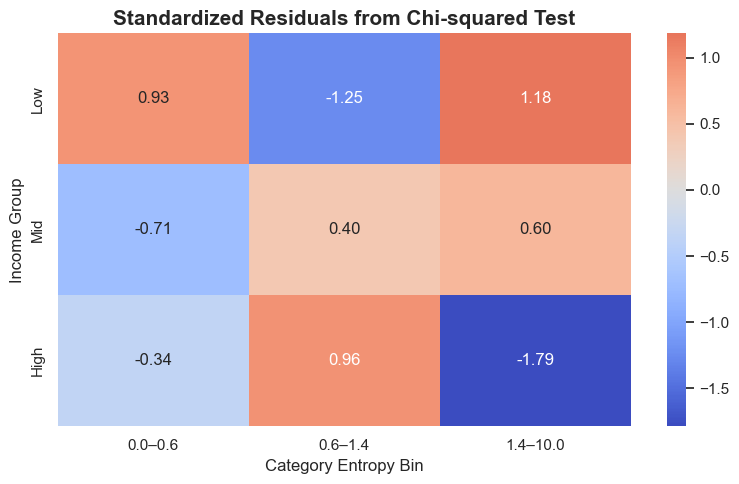

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Define labeled bins for category entropy
bin_edges = [0, 0.6, 1.4, 10]
bin_labels = ['0.0–0.6', '0.6–1.4', '1.4–10.0']  # updated labels

# Create entropy bin with numeric range labels
buyers_df['entropy_bin'] = pd.cut(
    buyers_df['category_entropy'],
    bins=bin_edges,
    labels=bin_labels,
    right=True,
    include_lowest=True
)

# Create contingency table
contingency_table = pd.crosstab(buyers_df['income_group_label'], buyers_df['entropy_bin'])

# Run chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Standardized residuals
residuals = (contingency_table - expected) / np.sqrt(expected)

# Plot residuals heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(residuals, annot=True, fmt=".2f", cmap="coolwarm", center=0)

plt.title("Standardized Residuals from Chi-squared Test", fontsize=15, weight='bold')
plt.xlabel("Category Entropy Bin")
plt.ylabel("Income Group")
plt.tight_layout()
plt.show()


